In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv')
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [3]:
weather = pd.read_csv('../data/weather.csv')
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [4]:
# Checking nulls
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [5]:
train.index

RangeIndex(start=0, stop=10506, step=1)

In [6]:
train.shape

(10506, 12)

In [7]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [8]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,10506,95,2007-08-01,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,10506,138,"ORD Terminal 5, O'Hare International Airport, ...",750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Species,10506,7,CULEX PIPIENS/RESTUANS,4752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,10506,NaN,NaN,NaN,35.6878,24.3395,10,12,33,52,98
Street,10506,128,W OHARE AIRPORT,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trap,10506,136,T900,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AddressNumberAndStreet,10506,138,"1000 W OHARE AIRPORT, Chicago, IL",750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,10506,NaN,NaN,NaN,41.8411,0.112742,41.6446,41.733,41.8463,41.9547,42.0174
Longitude,10506,NaN,NaN,NaN,-87.6999,0.0965142,-87.931,-87.7601,-87.695,-87.6278,-87.5316
AddressAccuracy,10506,NaN,NaN,NaN,7.81953,1.45292,3,8,8,9,9


In [9]:
train["Date"] = pd.to_datetime(train["Date"], infer_datetime_format=True)

In [10]:
train['Address'] = train['Address'].astype('category')
train['Species'] = train['Species'].astype('category')
train['Street'] = train['Street'].astype('category')
train['Trap'] = train['Trap'].astype('category')
train['AddressNumberAndStreet'] = train['AddressNumberAndStreet'].astype('category')

In [11]:
train.dtypes

Date                      datetime64[ns]
Address                         category
Species                         category
Block                              int64
Street                          category
Trap                            category
AddressNumberAndStreet          category
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

In [12]:
sns.set()
plt.rcParams['figure.figsize'] = [15, 10]
sns.set(font_scale=2)

In [13]:
bar_species1 = pd.DataFrame(train['Species'].value_counts()).reset_index()

In [14]:
bar_species1 = pd.merge(bar_species1, pd.DataFrame(train[train['WnvPresent']==1]['Species'].value_counts()).reset_index(), how='left', on='index')

In [15]:
bar_species1.columns = ['species', 'num_observations', 'obs_w_wnv']

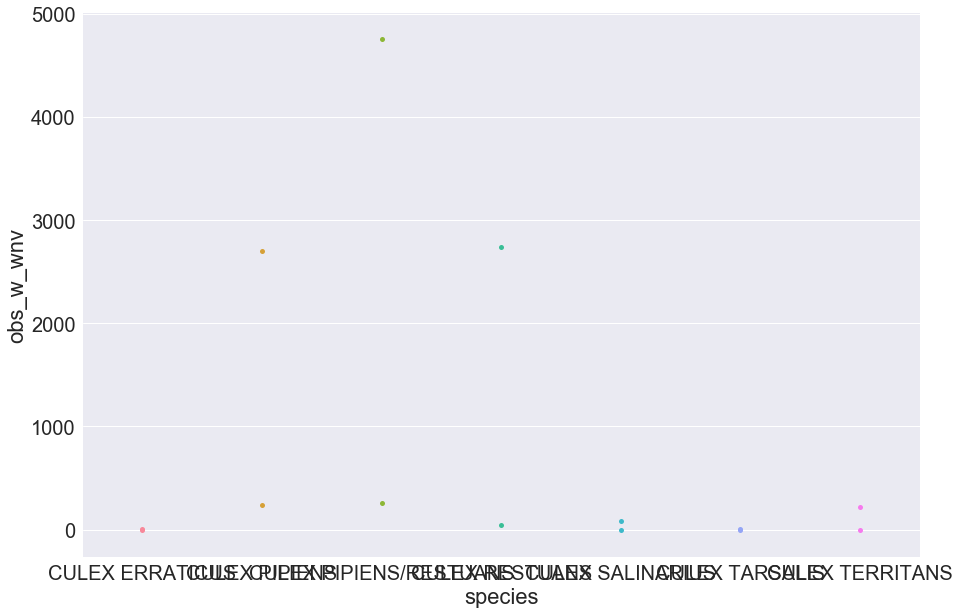

In [16]:
sns.stripplot(x="species", y="num_observations", data=bar_species1)
sns.stripplot(x="species", y="obs_w_wnv", data=bar_species1)

In [17]:
bar_species1


,species,num_observations,obs_w_wnv
0,CULEX PIPIENS/RESTUANS,4752,262
1,CULEX RESTUANS,2740,49
2,CULEX PIPIENS,2699,240
3,CULEX TERRITANS,222,0
4,CULEX SALINARIUS,86,0
5,CULEX TARSALIS,6,0
6,CULEX ERRATICUS,1,0


In [18]:
train['Species'] = train['Species'].str.replace('CULEX ', '')


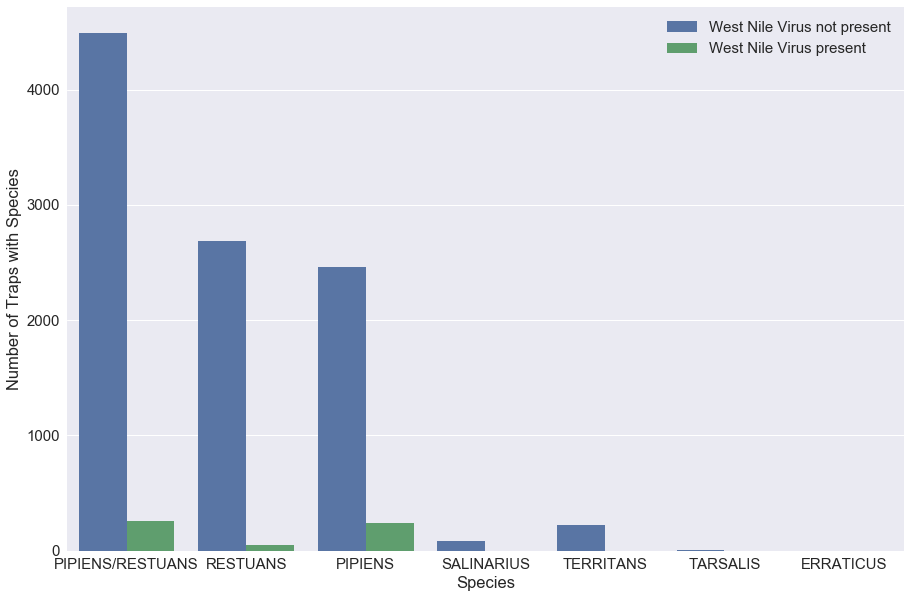

In [19]:
sns.set(font_scale=1.5)
sns.countplot(x='Species', hue='WnvPresent', data=train)
plt.xticks(rotation=0)
plt.legend(['West Nile Virus not present', 'West Nile Virus present'], loc=1)
plt.ylabel('Number of Traps with Species')
plt.show()

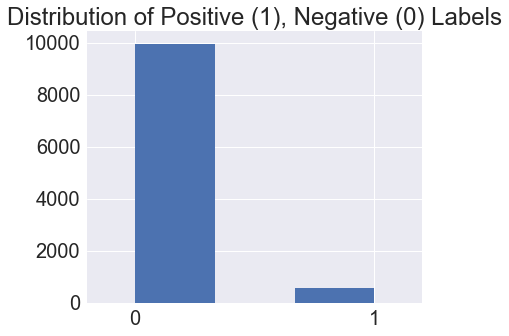

In [102]:
plt.figure(figsize=(6,5))
plt.hist(train['WnvPresent'], bins=3)
plt.title('Distribution of Positive (1), Negative (0) Labels')
plt.xlim((-0.2,1.2))
plt.xticks([0,1]);

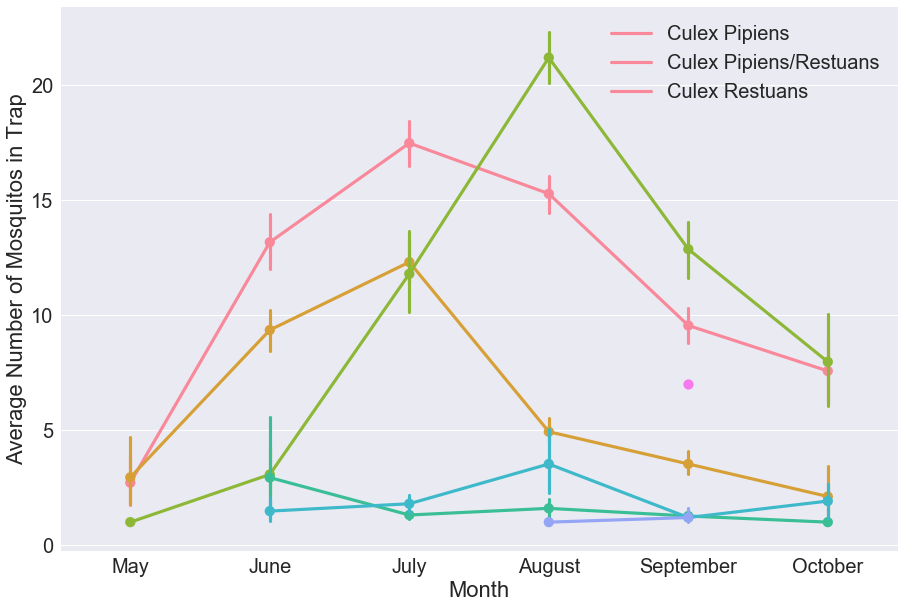

In [117]:
_ = sns.pointplot(x='Month', y="NumMosquitos", hue='Species', data=train)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')
plt.legend(['Culex Pipiens', 'Culex Pipiens/Restuans', 'Culex Restuans'])

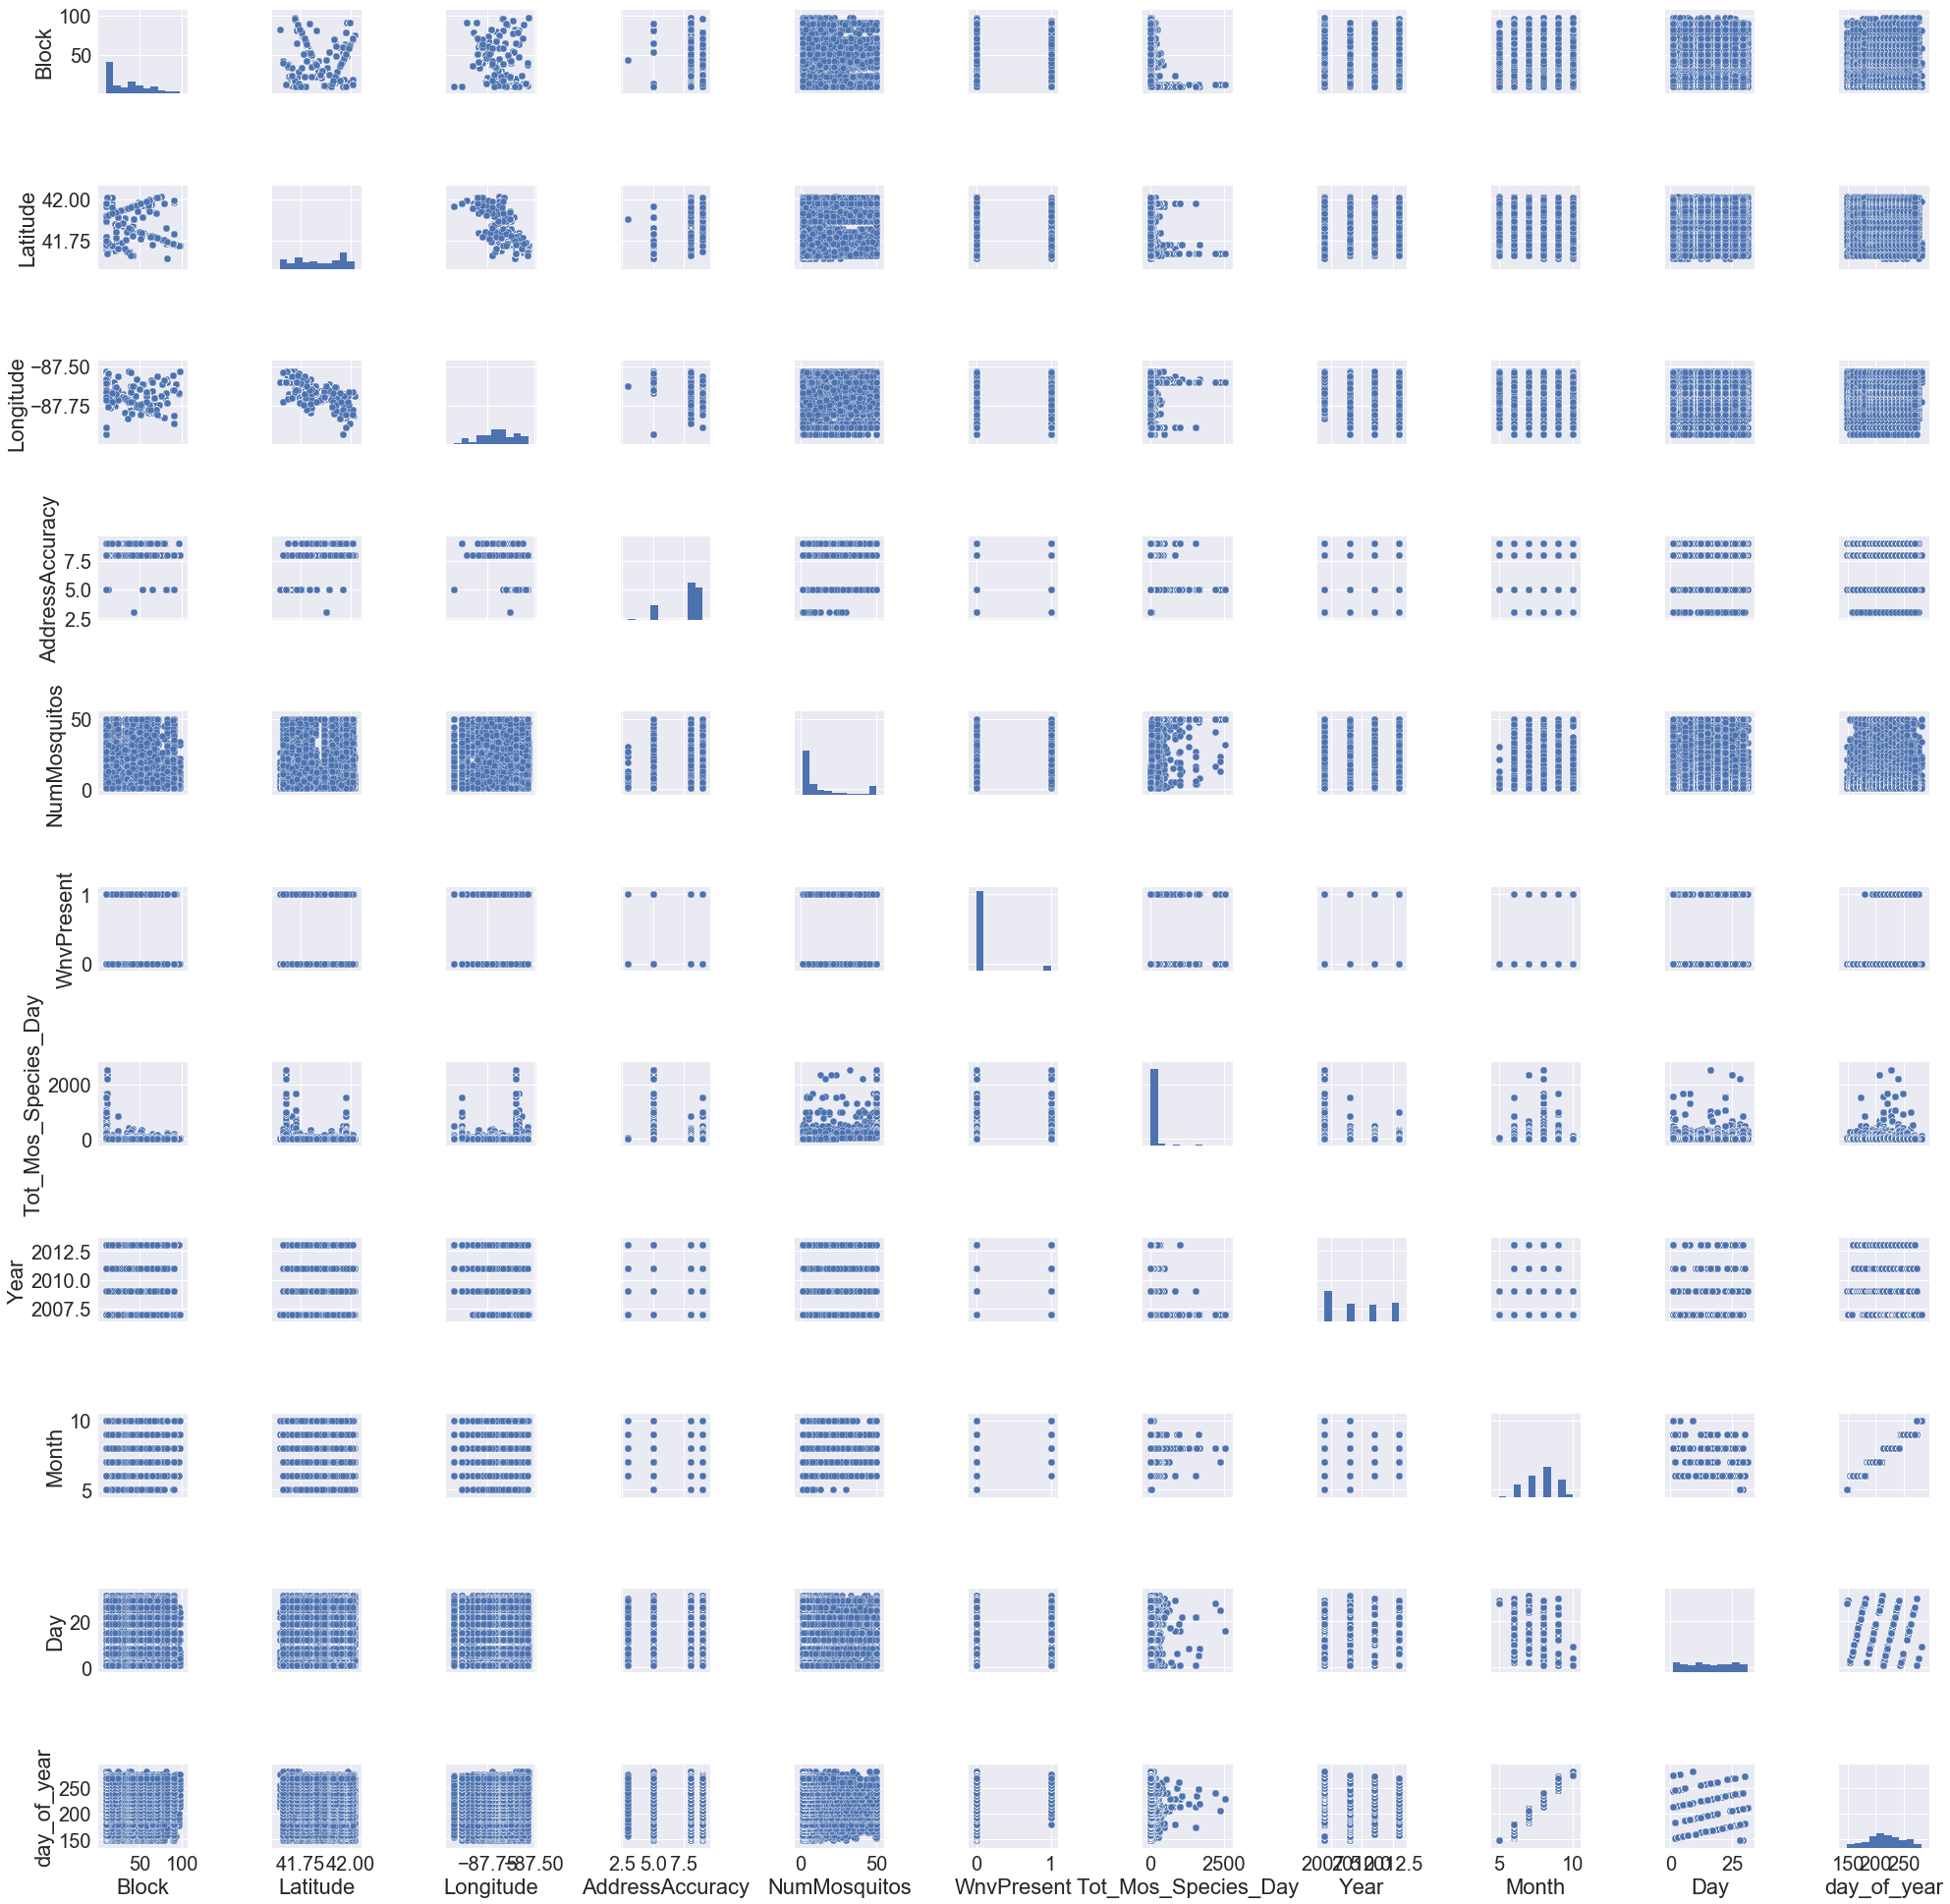

In [98]:
sns.pairplot(train)

In [112]:
latitude_list = []

for i in set(train['Latitude'].values):
    latitude_list.append(train[train['Latitude'] == i]['WnvPresent'].mean())

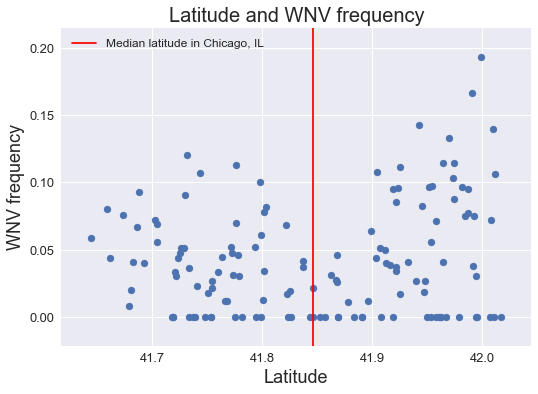

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(list(set(train['Latitude'].values)), latitude_list)
plt.axvline(train['Latitude'].median(),  color='red', label='Median latitude in Chicago, IL')
plt.xlabel('Latitude', size=18)
plt.ylabel('WNV frequency', size=18)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Latitude and WNV frequency', size=20)
plt.legend(fontsize=12, loc=2)
plt.tight_layout()

In [22]:
weather.head(1)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2


In [23]:
train[train.NumMosquitos == 50]
train.groupby(['Date', 'Trap', 'Species'], as_index=False)['NumMosquitos'].sum().sort_values('NumMosquitos', ascending=False).head()

,Date,Trap,Species,NumMosquitos
16759,2007-08-16,T115,PIPIENS,2532.0
8191,2007-07-25,T115,PIPIENS,2356.0
21519,2007-08-28,T115,PIPIENS,2207.0
13931,2007-08-08,T138,PIPIENS,1658.0
23423,2007-09-05,T115,PIPIENS,1648.0


In [24]:
train = pd.merge(train, train.groupby(['Date', 'Trap', 'Species'], as_index=False)['NumMosquitos'].sum(), how='left', on=['Date', 'Trap', 'Species'])

In [25]:
train.columns = ['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Tot_Mos_Species_Day']

In [26]:
train['Year'] = train['Date'].dt.year

In [28]:
impact=train.groupby(['AddressNumberAndStreet', 'Trap'], as_index=False)['WnvPresent', 'NumMosquitos'].sum().sort_values('WnvPresent')
train[train['Year']==2009].groupby('Date', as_index=False)['WnvPresent'].sum()
train[['NumMosquitos']].sum()
train[(train['Trap']=='T115') | (train['Trap']=='T900') | (train['Trap']=='T138')]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tot_Mos_Species_Day,Year
529,2007-07-18,"South Doty Avenue, Chicago, IL, USA",PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,0,50.0,2007
530,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0,100.0,2007
531,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0,100.0,2007
532,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,26,0,76.0,2007
533,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0,76.0,2007
534,2007-07-18,"South Stony Island Avenue, Chicago, IL, USA",SALINARIUS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,2,0,2.0,2007
570,2007-07-19,"South Stony Island Avenue, Chicago, IL, USA",PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,7,0,7.0,2007
571,2007-07-19,"South Stony Island Avenue, Chicago, IL, USA",RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,25,0,25.0,2007
572,2007-07-19,"South Stony Island Avenue, Chicago, IL, USA",PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,0,50.0,2007
573,2007-07-19,"South Stony Island Avenue, Chicago, IL, USA",TERRITANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,4,0,4.0,2007


In [30]:
impact['percent_virus'] = impact['WnvPresent']/impact['NumMosquitos']

In [31]:
impact.sort_values('WnvPresent', ascending=False).head(10)

,AddressNumberAndStreet,Trap,WnvPresent,NumMosquitos,percent_virus
1086,"1000 W OHARE AIRPORT, Chicago, IL",T900,66.0,15386.0,0.004290
2530,"1200 S DOTY AVE, Chicago, IL",T115,41.0,21668.0,0.001892
9793,"4100 N OAK PARK AVE, Chicago, IL",T002,18.0,3710.0,0.004852
630,"1000 S STONY ISLAND AVE, Chicago, IL",T138,16.0,9936.0,0.001610
10746,"4600 N MILWAUKEE AVE, Chicago, IL",T003,14.0,1346.0,0.010401
17529,"8200 S KOSTNER AVE, Chicago, IL",T225,11.0,2014.0,0.005462
8169,"3600 N PITTSBURGH AVE, Chicago, IL",T011,11.0,1311.0,0.008391
6203,"2400 E 105TH ST, Chicago, IL",T128,11.0,3315.0,0.003318
15647,"7000 N MOSELL AVE, Chicago, IL",T008,10.0,2668.0,0.003748
1223,"1000 W OHARE, Chicago, IL",T903,10.0,2327.0,0.004297


In [32]:
impact.sort_values('percent_virus', ascending=False).head(25)

,AddressNumberAndStreet,Trap,WnvPresent,NumMosquitos,percent_virus
13468,"6000 W ROSCOE ST, Chicago, IL",T005,2.0,50.0,0.040000
13197,"6000 N AVONDALE AVE, Chicago, IL",T006,4.0,107.0,0.037383
14913,"6500 N OAK PARK AVE, Chicago, IL",T143,6.0,230.0,0.026087
16741,"7900 W FOSTER AVE, Chicago, IL",T015,4.0,169.0,0.023669
17080,"8100 E 91ST ST, Chicago, IL",T107,2.0,86.0,0.023256
12153,"5200 S NORDICA, Chicago, IL",T070,2.0,90.0,0.022222
10226,"4200 W 31ST ST, Chicago, IL",T036,1.0,52.0,0.019231
9472,"4000 N AUSTIN AVE, Chicago, IL",T142,1.0,58.0,0.017241
15198,"6600 S KILPATRICK AVE, Chicago, IL",T156,1.0,61.0,0.016393
9716,"4000 S DEARBORN ST, Chicago, IL",T081,3.0,207.0,0.014493


In [33]:
train[train.Trap == 'T230'].groupby('Year')['NumMosquitos', 'WnvPresent'].sum()

,NumMosquitos,WnvPresent
Year,,
2009,24,1
2011,227,1
2013,393,5


In [34]:
train[train['Date']=='2009-06-22'].head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tot_Mos_Species_Day,Year
4272,2009-06-22,"1100 Roosevelt Road, Chicago, IL 60608, USA",PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,19,0,19.0,2009
4273,2009-06-22,"1100 Roosevelt Road, Chicago, IL 60608, USA",RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,36,0,36.0,2009
4274,2009-06-22,"ORD Terminal 5, O'Hare International Airport, ...",PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,23,0,1520.0,2009
4275,2009-06-22,"ORD Terminal 5, O'Hare International Airport, ...",PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0,1520.0,2009
4276,2009-06-22,"ORD Terminal 5, O'Hare International Airport, ...",PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0,1520.0,2009


In [58]:
train['Year'].value_counts()

2007    3811
2013    2392
2009    2249
2011    2054
Name: Year, dtype: int64

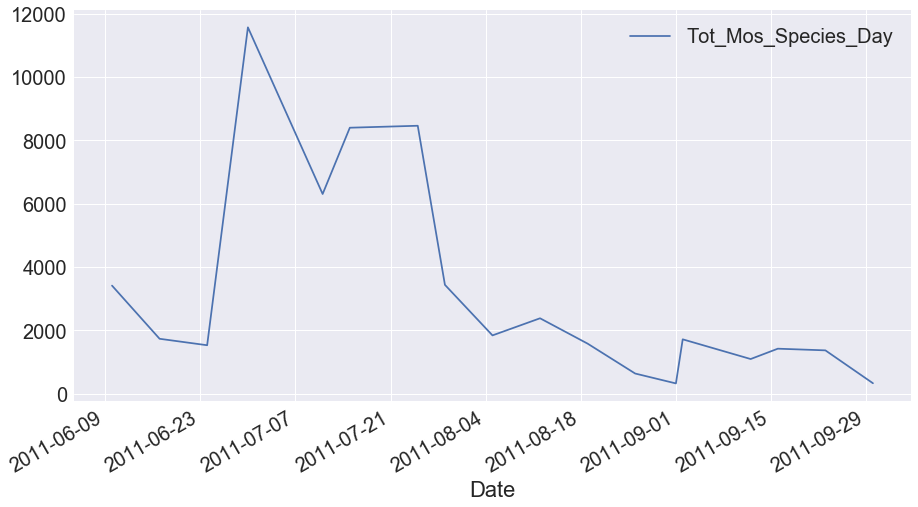

In [69]:
by_day = train[train['Year']==2011].groupby('Date', as_index=False)['Tot_Mos_Species_Day'].sum()
by_day.plot('Date', figsize=(15,8))

In [36]:
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['day_of_year']= train['Date'].dt.dayofyear

Text(0,0.5,'Average Number of Mosquitos in Trap')

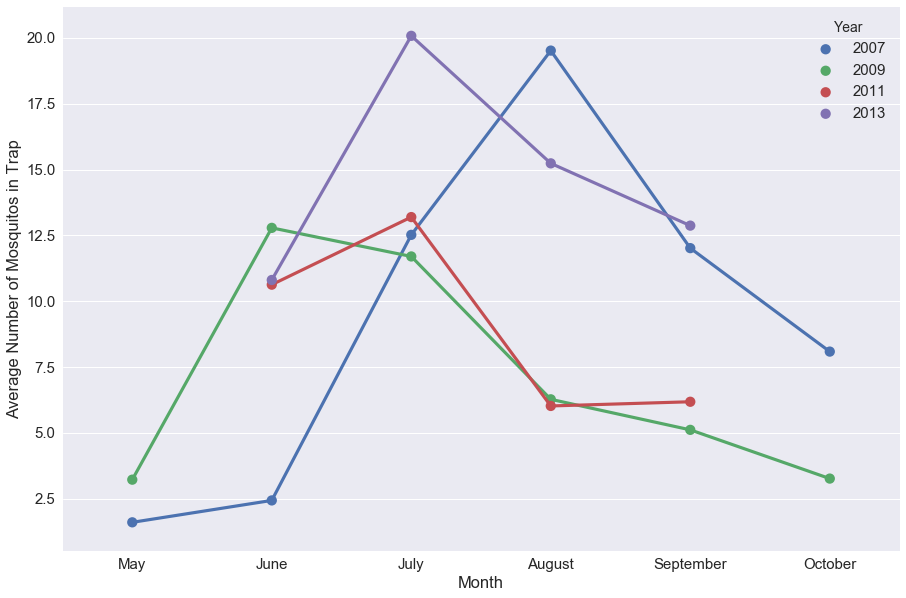

In [37]:
_ = sns.pointplot(x='Month', y="NumMosquitos", hue="Year", data=train.groupby(['Year', 'Month'], as_index=False)['NumMosquitos'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')

Text(0,0.5,'Average Cases of WNV in Trap')

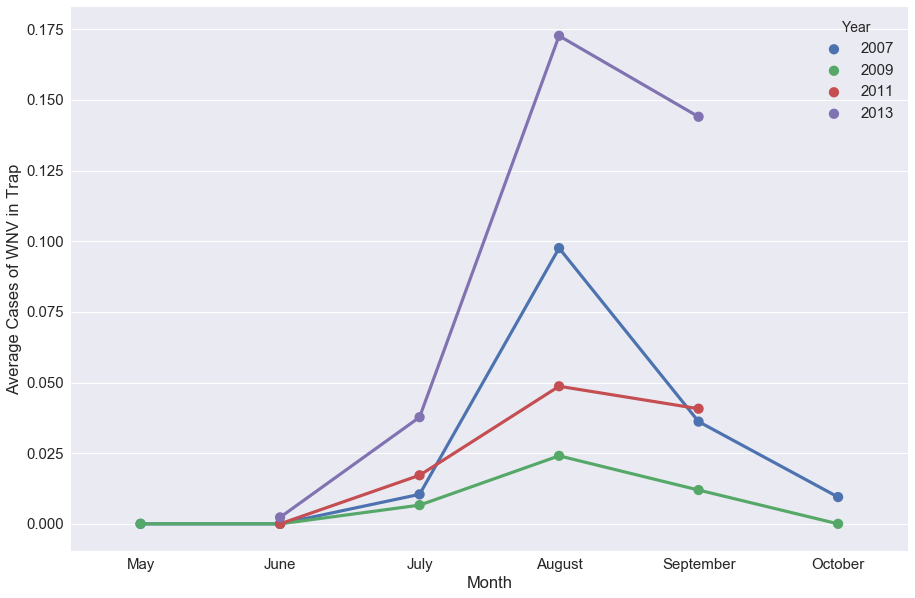

In [38]:
_ = sns.pointplot(x='Month', y="WnvPresent", hue="Year", data=train.groupby(['Year', 'Month'], as_index=False)['WnvPresent'].mean(),)


_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Cases of WNV in Trap')

Text(0,0.5,'Average Cases of WNV in Trap')

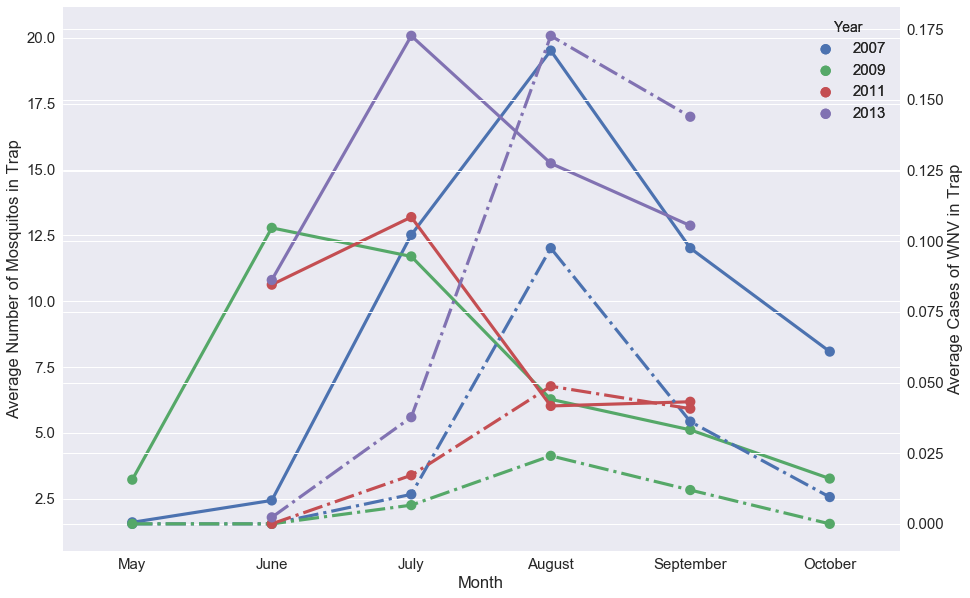

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.pointplot(x='Month', y="NumMosquitos", hue="Year", data=train.groupby(['Year', 'Month'], as_index=False)['NumMosquitos'].mean(),)
plt.ylabel('Average Number of Mosquitos in Trap')
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='Month', y="WnvPresent", hue="Year", linestyles='-.', data=train.groupby(['Year', 'Month'], as_index=False)['WnvPresent'].mean(),)
ax1.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Cases of WNV in Trap')

In [40]:
train.groupby('Year')['Trap'].count()

Year
2007    3811
2009    2249
2011    2054
2013    2392
Name: Trap, dtype: int64

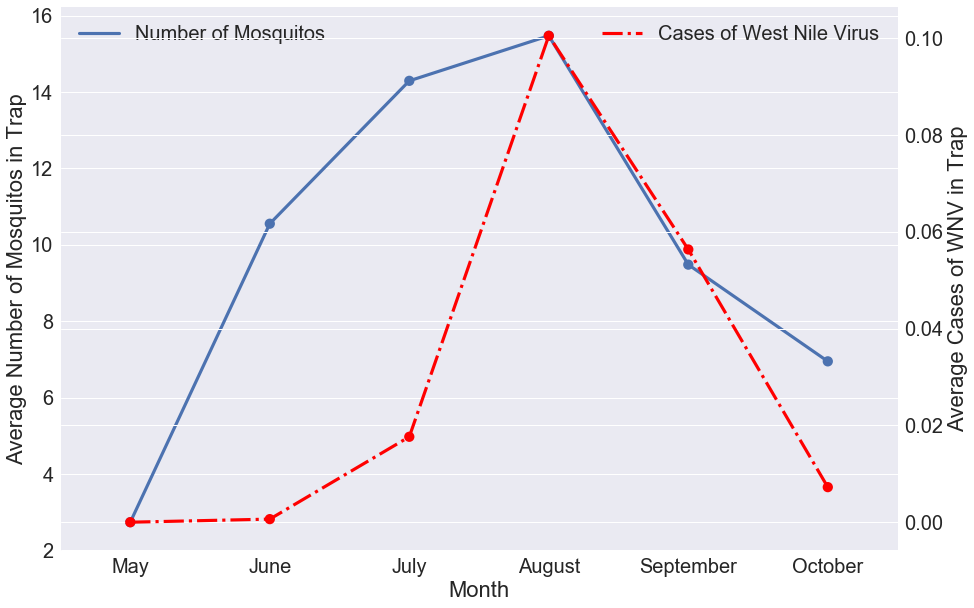

In [41]:
sns.set(font_scale=2.0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.pointplot(x='Month', y="NumMosquitos", data=train.groupby(['Month'], as_index=False)['NumMosquitos'].mean(),)
plt.ylabel('Average Number of Mosquitos in Trap')
plt.legend(['Number of Mosquitos'], loc=2)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='Month', y="WnvPresent", linestyles='-.', color='r', data=train.groupby(['Month'], as_index=False)['WnvPresent'].mean(),)
ax1.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Cases of WNV in Trap')
plt.legend(['Cases of West Nile Virus'], loc=1)